In [17]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier




In [3]:
letters_df = pd.read_csv('C:\\Users\\DELL\\Downloads\\letters.csv')


In [4]:
letters_df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [5]:
letters_df.describe(())

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
letters_df.columns.tolist()

['label',
 'pixel43',
 'pixel44',
 'pixel92',
 'pixel124',
 'pixel125',
 'pixel126',
 'pixel127',
 'pixel128',
 'pixel129',
 'pixel130',
 'pixel131',
 'pixel132',
 'pixel133',
 'pixel134',
 'pixel135',
 'pixel136',
 'pixel137',
 'pixel138',
 'pixel146',
 'pixel147',
 'pixel148',
 'pixel149',
 'pixel150',
 'pixel151',
 'pixel152',
 'pixel153',
 'pixel154',
 'pixel155',
 'pixel156',
 'pixel157',
 'pixel158',
 'pixel159',
 'pixel160',
 'pixel327',
 'pixel328',
 'pixel329',
 'pixel351',
 'pixel410',
 'pixel411',
 'pixel412',
 'pixel413',
 'pixel414',
 'pixel415',
 'pixel416',
 'pixel417']

In [7]:
letters_df.shape


(42000, 46)

### Data Cleaning & Preprocessing
#### 1. Handling Missing Values
#### Check for missing values and handle them accordingly:



In [9]:
# checking for missing values
for c in letters_df.columns:
    print('Total Missing values in \'{}\' are {}.'.format(c,letters_df[c].isna().sum()))

Total Missing values in 'label' are 0.
Total Missing values in 'pixel43' are 0.
Total Missing values in 'pixel44' are 0.
Total Missing values in 'pixel92' are 0.
Total Missing values in 'pixel124' are 0.
Total Missing values in 'pixel125' are 0.
Total Missing values in 'pixel126' are 0.
Total Missing values in 'pixel127' are 0.
Total Missing values in 'pixel128' are 0.
Total Missing values in 'pixel129' are 0.
Total Missing values in 'pixel130' are 0.
Total Missing values in 'pixel131' are 0.
Total Missing values in 'pixel132' are 0.
Total Missing values in 'pixel133' are 0.
Total Missing values in 'pixel134' are 0.
Total Missing values in 'pixel135' are 0.
Total Missing values in 'pixel136' are 0.
Total Missing values in 'pixel137' are 0.
Total Missing values in 'pixel138' are 0.
Total Missing values in 'pixel146' are 0.
Total Missing values in 'pixel147' are 0.
Total Missing values in 'pixel148' are 0.
Total Missing values in 'pixel149' are 0.
Total Missing values in 'pixel150' are 0

## Outliers Detection

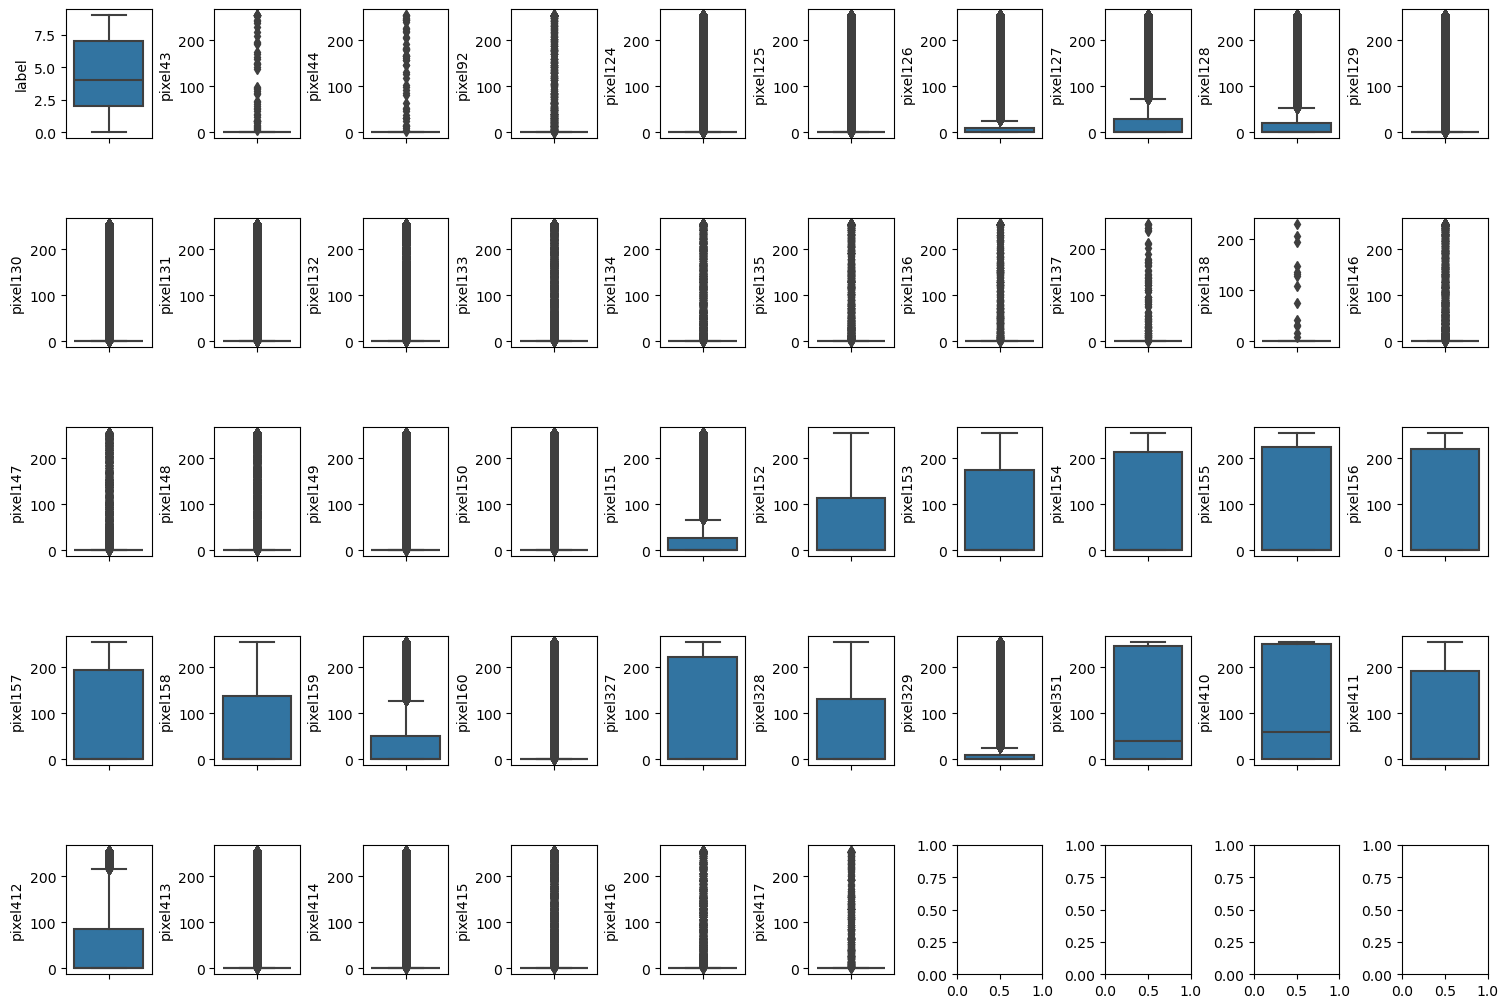

In [12]:
fig, axs = plt.subplots(ncols=10, nrows=5, figsize=(15, 10))
index = 0
axs = axs.flatten()

for k, v in letters_df.items():
    sns.boxplot(y=k, data=letters_df, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
# Calculate and display outlier percentage for each numeric column

for col in letters_df.select_dtypes(include=np.number).columns:
    q1 = letters_df[col].quantile(0.25)
    q3 = letters_df[col].quantile(0.75)
    irq = q3 - q1
    outliers = letters_df[(letters_df[col] < (q1 - 1.5 * irq)) | (letters_df[col] > (q3 + 1.5 * irq))]
    perc_outliers = (outliers.shape[0] / letters_df.shape[0]) * 100
    print(f"Column {col} has {perc_outliers:.2f}% outliers.")

Column label has 0.00% outliers.
Column pixel43 has 0.14% outliers.
Column pixel44 has 0.12% outliers.
Column pixel92 has 1.03% outliers.
Column pixel124 has 18.08% outliers.
Column pixel125 has 22.58% outliers.
Column pixel126 has 23.68% outliers.
Column pixel127 has 21.89% outliers.
Column pixel128 has 22.67% outliers.
Column pixel129 has 24.50% outliers.
Column pixel130 has 20.13% outliers.
Column pixel131 has 15.26% outliers.
Column pixel132 has 10.52% outliers.
Column pixel133 has 6.60% outliers.
Column pixel134 has 3.76% outliers.
Column pixel135 has 1.77% outliers.
Column pixel136 has 0.76% outliers.
Column pixel137 has 0.23% outliers.
Column pixel138 has 0.03% outliers.
Column pixel146 has 3.00% outliers.
Column pixel147 has 5.65% outliers.
Column pixel148 has 9.50% outliers.
Column pixel149 has 14.75% outliers.
Column pixel150 has 21.18% outliers.
Column pixel151 has 21.67% outliers.
Column pixel152 has 0.00% outliers.
Column pixel153 has 0.00% outliers.
Column pixel154 has 0.

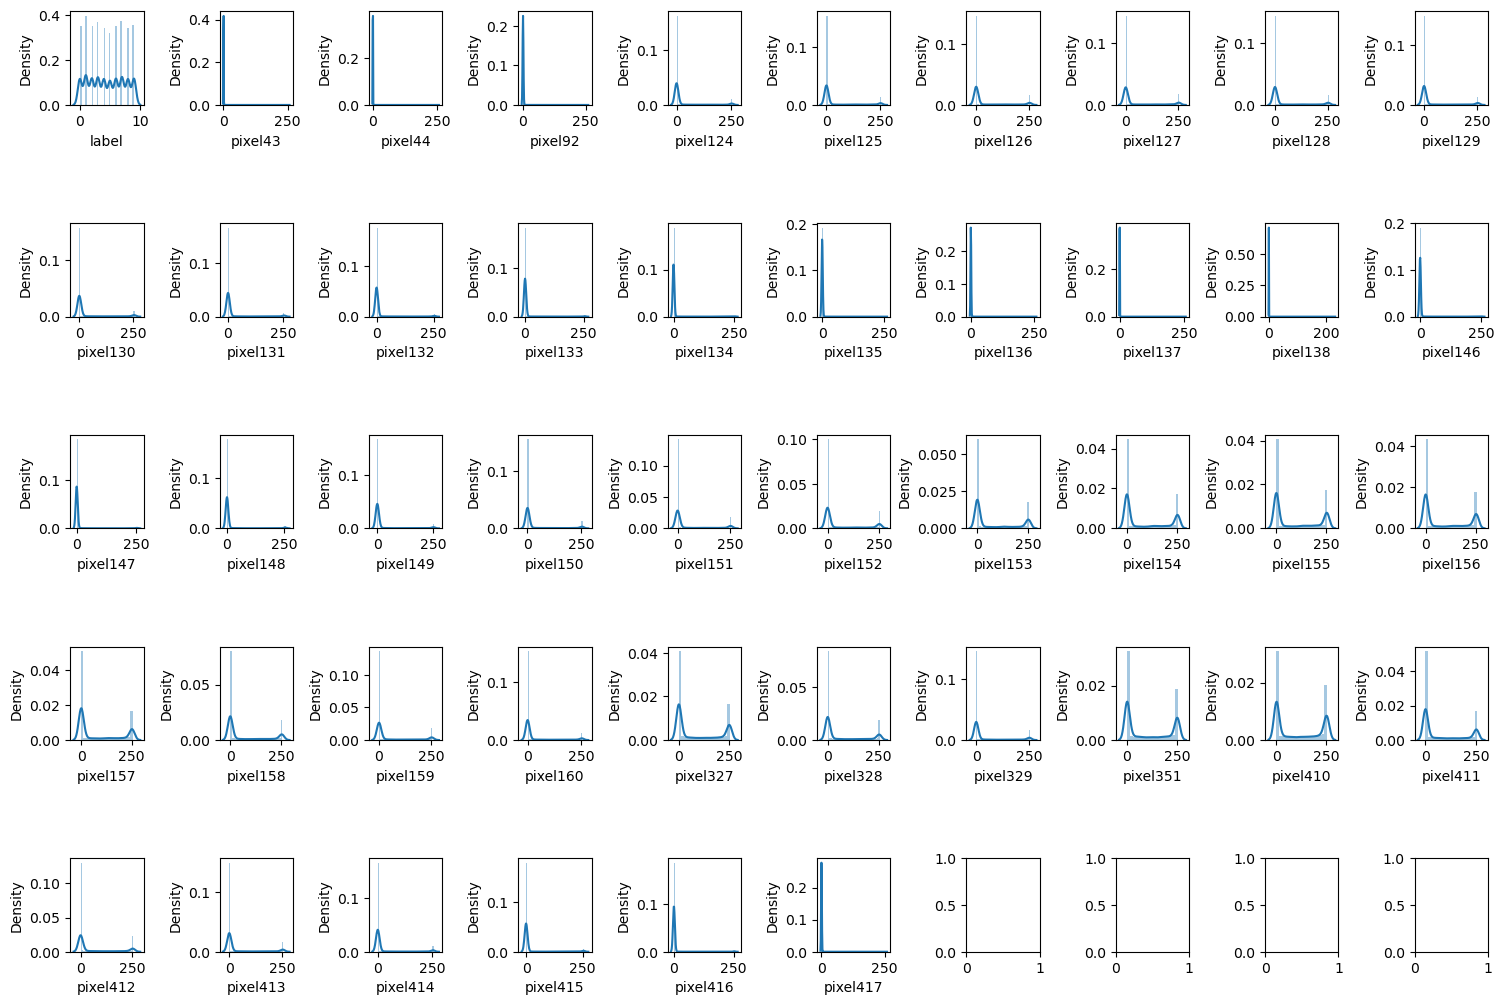

In [15]:
fig, axs = plt.subplots(ncols=10, nrows=5, figsize=(15, 10))
index = 0
axs = axs.flatten()

for k,v in letters_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
# Data Preprocessing: Normalize the pixel values (0 to 1)
# Extract features (pixels) and label
x = letters_df.drop('label', axis=1)
y = letters_df['label']

# Normalize pixel values from 0-255 to 0-1
x_normalized = x / 255.0

# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to confirm the split
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


((33600, 45), (8400, 45), (33600,), (8400,))

### Part 1:

#### Build a KNN model to predict handwriting correctly. Discuss the accuracy that you found and some of the challenges involved with using KNN for this model.

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

## Estimate the accuracy of the classifier on the test data (unseen data)

In [20]:
knn.score(x_test, y_test)

0.6486904761904762

([<matplotlib.axis.XTick at 0x16c6c2212d0>,
 [Text(0, 0, '0'), Text(5, 0, '5'), Text(15, 0, '15'), Text(20, 0, '20')])

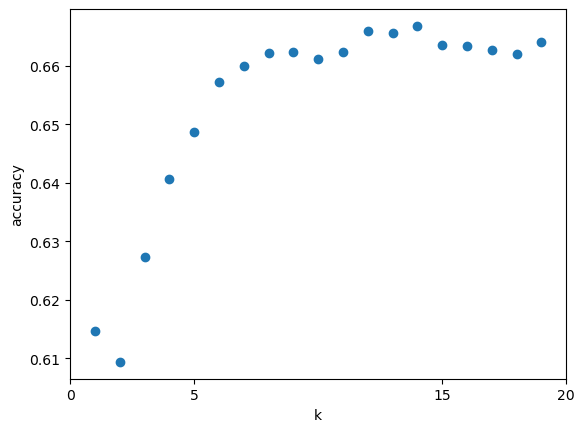

In [21]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 15, 20])

In [40]:
# Find the index of the highest accuracy score
optimal_k_index = scores.index(max(scores))

# The corresponding k value is the k at that index
optimal_k = k_range[optimal_k_index]

# Print the optimal k value
print(f'The optimal value of k is: {optimal_k}')
# Accuracy for k = 14 (index 13 because indexing starts from 0)
accuracy_k_14 = scores[13]

# Print the accuracy in percentage
print(f'Accuracy for k = 14: {accuracy_k_14 * 100:.2f}%')


The optimal value of k is: 14
Accuracy for k = 14: 66.68%


### The KNN model achieved an accuracy of 66.68% on the test set, which is reasonable given the complexity of the handwritten digit dataset. 

### However, there are some challenges associated with using KNN for this problem. KNN can struggle with high-dimensional data, like this dataset where each pixel is a feature. 
#### As the number of features increases, the distance between points becomes less meaningful. Despite these challenges, KNN performed reasonably well in this case, balancing simplicity and prediction accuracy.

####


### Part 2:

#### Build a neural network model to predict handwriting. Discuss the accuracy and some of the challenges that you had.

In [22]:
mlp = MLPClassifier(3, solver = 'sgd', learning_rate_init = 0.01, max_iter = 200)
#"sgd": stochastic gradient descent
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.4957142857142857

In [23]:
mlp = MLPClassifier((3, 2), solver = 'sgd', learning_rate_init = 0.01, max_iter = 1000)
#"sgd": stochastic gradient descent
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.4594047619047619

In [24]:
mlp = MLPClassifier((4, 5, 4), solver = 'sgd', learning_rate_init = 0.05, max_iter = 2000)
#"sgd": stochastic gradient descent
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.5004761904761905

In [25]:
y_pred = mlp.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.50


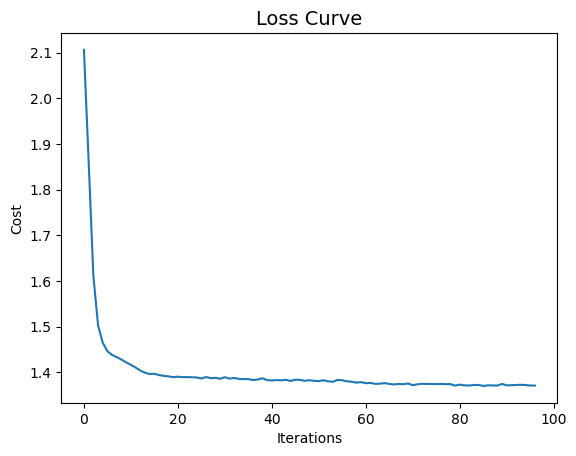

In [26]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [27]:

parameters={'hidden_layer_sizes': [(5), (5,4), (5,4,4), (5,3,2,2),(5,2,4,5,3)],
'alpha': [0.0001, 0.05], 'activation': ['logistic', 'relu', 'tanh']}


clf = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,verbose=2,cv=10)
clf.fit(x_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  32.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  32.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  30.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  31.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  38.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  28.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  24.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  21.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  21.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5; total time=  20.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 4); total time=  36.

### The neural network model achieved a test accuracy of around 50%, which is significantly lower than the accuracy of the KNN model.
### In this task, the model's complexity and the nature of the dataset likely limited its performance, making it less effective than the simpler KNN approach.

### Part 3:

#### Using multiple benchmarking metrics to compare and contrast both models. Summarize your findings and suggest a final model for the school to use.

In [28]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test , clf.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       861
           1       0.79      0.93      0.86       971
           2       0.58      0.46      0.51       817
           3       0.55      0.48      0.51       834
           4       0.58      0.33      0.42       802
           5       0.51      0.57      0.54       744
           6       0.76      0.85      0.80       821
           7       0.45      0.75      0.56       914
           8       0.59      0.45      0.51       789
           9       0.43      0.35      0.39       847

    accuracy                           0.61      8400
   macro avg       0.61      0.60      0.59      8400
weighted avg       0.61      0.61      0.60      8400



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_accuracy_train = accuracy_score(y_train, knn.predict(x_train))
knn_accuracy_test = accuracy_score(y_test, knn.predict(x_test))
knn_precision = precision_score(y_test, knn.predict(x_test), average='macro')
knn_recall = recall_score(y_test, knn.predict(x_test), average='macro')
knn_f1 = f1_score(y_test, knn.predict(x_test), average='macro')



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlp_accuracy_train = accuracy_score(y_train, mlp.predict(x_train))
mlp_accuracy_test = accuracy_score(y_test, mlp.predict(x_test))
mlp_precision = precision_score(y_test, mlp.predict(x_test), average='macro')
mlp_recall = recall_score(y_test, mlp.predict(x_test), average='macro')
mlp_f1 = f1_score(y_test, mlp.predict(x_test), average='macro')



In [37]:
import time

# Measure KNN processing time
start_time = time.time()
knn.fit(x_train, y_train)
knn_processing_time = time.time() - start_time

# Measure MLP (Neural Network) processing time
start_time = time.time()
mlp.fit(x_train, y_train)
mlp_processing_time = time.time() - start_time




In [38]:
evaluation_metrics = {
    'Model': ['KNN', 'Neural Network'],
    'Accuracy_train': [knn_accuracy_train, mlp_accuracy_train],  
    'Accuracy_test': [knn_accuracy_test, mlp_accuracy_test],    
    'Precision': [knn_precision, mlp_precision],                 
    'Recall': [knn_recall, mlp_recall],                         
    'f1': [knn_f1, mlp_f1],                                      
    'Processing Time (sec)': [knn_processing_time, mlp_processing_time]  
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(evaluation_metrics)

# Display the metrics DataFrame
metrics_df


,Model,Accuracy_train,Accuracy_test,Precision,Recall,f1,Processing Time (sec)
0,KNN,0.686012,0.664048,0.667940,0.656436,0.656128,0.014100
1,Neural Network,0.502440,0.500476,0.469769,0.486441,0.454272,15.408404


### Given the results of these metrics, KNN emerges as the better-performing model in terms of accuracy, precision, recall, F1 score, and efficiency. For the school's objective of predicting handwriting and identifying students who may need help with motor skills, KNN provides a faster, more reliable solution. Therefore, KNN is the recommended model for this task.